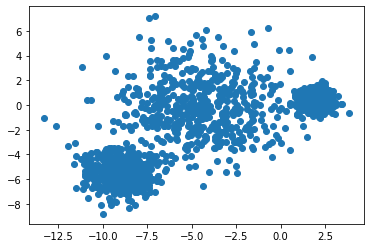

In [203]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/dinhvietcuong1996/Lab-MachineLearningCourse/master/Lab05/data.csv")
X = data[["x1", "x2"]].values

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

Sum of squared distances of samples to their closest cluster center:  5747.987366346275
[[-4.90914469  0.11313436]
 [ 1.6400471   0.44241664]
 [-8.87177269 -5.36630437]]


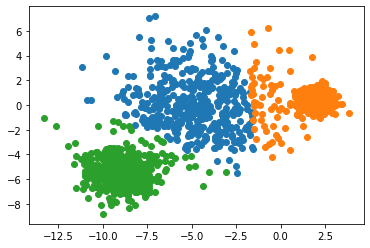

In [204]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
    plt.scatter(X[:,0][clusters==ii], X[:,1][clusters==ii])
print("Sum of squared distances of samples to their closest cluster center: ", kmean.inertia_)
print(kmean.cluster_centers_)

In [205]:
def find_centroid(arr):
  centroid = np.mean(arr)
  return centroid

In [206]:
def find_label(point,list_centroid):
  min = 10000000
  label = -1
  for i in range(len(list_centroid)):
    if(math.sqrt((point[0]-list_centroid[i][0])**2 + (point[1]-list_centroid[i][1])**2) < min):
      min = math.sqrt((point[0]-list_centroid[i][0])**2 + (point[1]-list_centroid[i][1])**2)
      label = i
  return label

In [207]:
def WCV(arr, centroid):
  ans = 0
  for i in range(len(arr)):
    label = find_label(arr[i],centroid)
    # ans = ans + math.sqrt((arr[i][0] - centroid[label][0])**2 + (arr[i][1] - centroid[label][1])**2)
    ans = ans + (arr[i][0] - centroid[label][0])**2 + (arr[i][1] - centroid[label][1])**2
  ans = ans/len(arr)
  return ans

In [208]:
K = list(range(1, 11))
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [209]:
def centroid_of_kCluster(data,k):

  for t in range(1,100):
    centroid = []
    for i in range(k):
      idx_i = data.index[data['label'] == i].tolist()
      cluster_i = X[idx_i]
      centroid_i_x = find_centroid(cluster_i[:,0])
      centroid_i_y = find_centroid(cluster_i[:,1])
      centroid.append([centroid_i_x,centroid_i_y])

    label = []
    for i in range(data.shape[0]):
      label.append(find_label(X[i],centroid))
    label = np.asarray(label)
    data['label'] = label
  return centroid

In [210]:
list_wcv = []
for k in K:
  df = data.copy()
  df['label'] = np.random.randint(k, size = df.shape[0])
  centroid = centroid_of_kCluster(df,k)
  wcv = WCV(X,centroid)
  list_wcv.append(wcv)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [211]:
list_wcv

[31.74123558294543,
 8.956761762290608,
 3.8319915775641893,
 2.872885422433948,
 2.2624954555170014,
 1.9876915517274523,
 1.806038845085169,
 1.809367393359399,
 1.6457607295312349,
 1.4237086097174327]

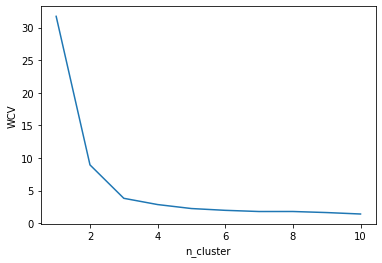

In [212]:
plt.plot(K,list_wcv)
plt.xlabel('n_cluster')
plt.ylabel('WCV')
plt.show()

Dựa theo đồ thị trên, ta thấy rằng khi n_cluster = 3 thì giá trị WCV không còn giảm đột ngột nữa mà giảm đi không đáng kể, do đó, ta có thể chọn n_cluster = 3

In [213]:
data_2 = data.copy()
data_2['label'] = np.random.randint(k, size = data_2.shape[0])

In [214]:
for t in range(1,100):
  centroid = []
  for i in range(3):
    idx_i = data_2.index[data_2['label'] == i].tolist()
    cluster_i = X[idx_i]
    centroid_i_x = find_centroid(cluster_i[:,0])
    centroid_i_y = find_centroid(cluster_i[:,1])
    centroid.append([centroid_i_x,centroid_i_y])

  label = []
  for i in range(data_2.shape[0]):
    label.append(find_label(X[i],centroid))
  label = np.asarray(label)
  data_2['label'] = label
centroid

[[1.6400470953307433, 0.4424166431164293],
 [-4.90914468710632, 0.11313436322665546],
 [-8.871772686551969, -5.36630437244372]]

In [215]:
x1 = data_2['x1'].values
x2 = data_2['x2'].values

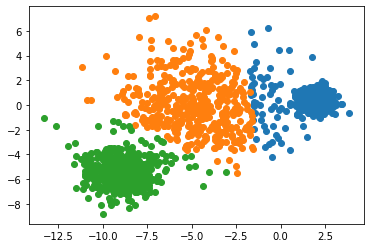

In [216]:
plt.scatter(x1[label == 0], x2[label == 0], label = '0')
plt.scatter(x1[label == 1], x2[label == 1], label = '1')
plt.scatter(x1[label == 2], x2[label == 2], label = '2')